### Supress Warnings and import all the relevant packages and libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the necessary packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

### Reading and preparing the data

In [3]:
# Read the data

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape of the dataframe

bike.shape

(730, 16)

In [5]:
# Checking the info for all the columns

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Dropping the unnecessary columns

bike = bike.drop(['instant','dteday','casual','registered','atemp'], axis=1)
bike.shape

(730, 11)

In [7]:
# Renaming the columns for better understanding

bike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Identifying the categorical and continuous variables

In [8]:
bike.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
windspeed     649
count         695
dtype: int64

In [9]:
# Mapping variables season, month, weekday, weathersit

bike['season'] = bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})

bike['month'] = bike.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

bike['weekday']  =bike.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',  5:'Fri', 6:'Sat'})

bike['weathersit'] = bike.weathersit.map({1: 'Clear', 2:'Cloudy', 3:'Light Snow', 4:'Heavy Rain'})

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Visualising the numeric variables

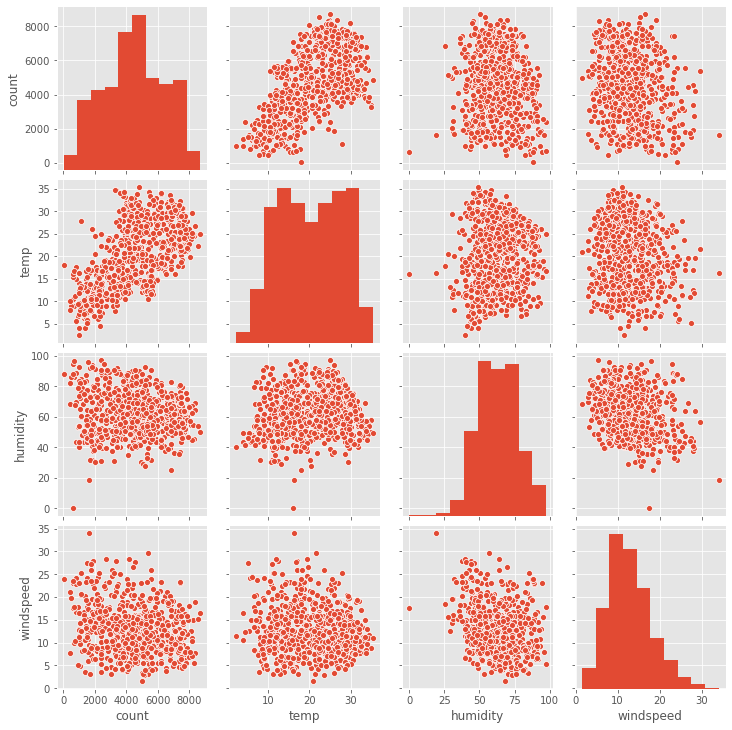

In [10]:
# Pairplot of all the numeric variables

sns.pairplot(bike, vars=['count', 'temp', 'humidity', 'windspeed'])
plt.show()

### Visualising the categorical variables

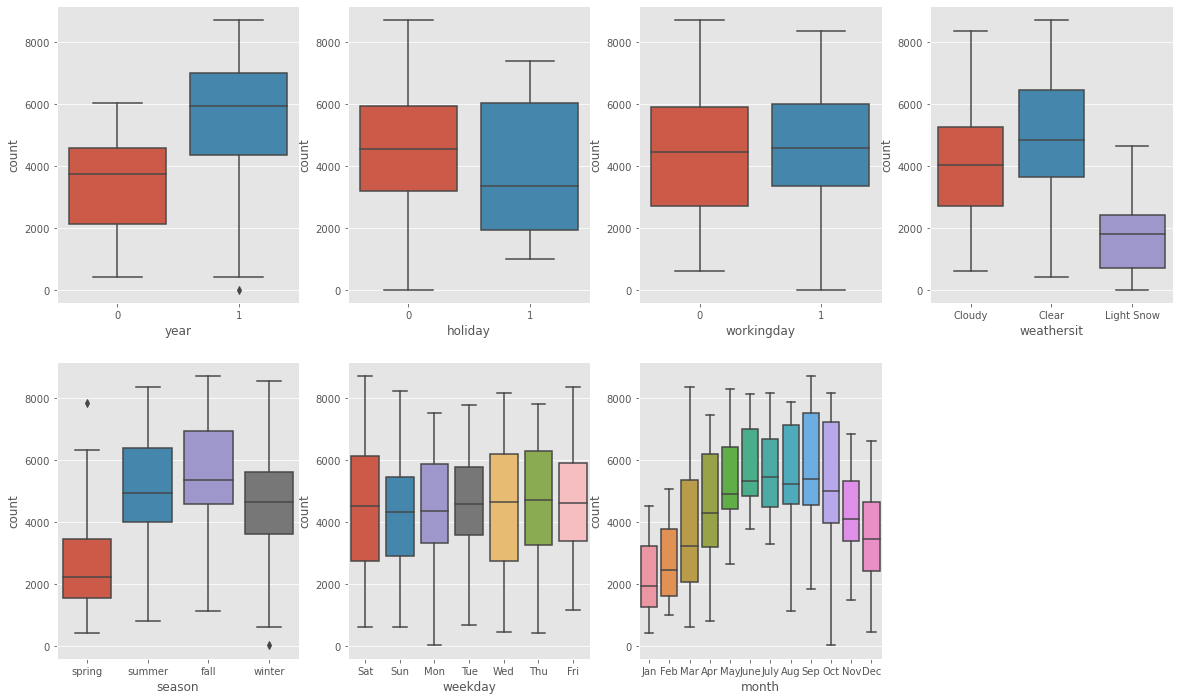

In [11]:
#Boxplot for some of the categorical variables with respect to the target varibale 'count'

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.show()

### Analysis between the target variable - count, and the other variables

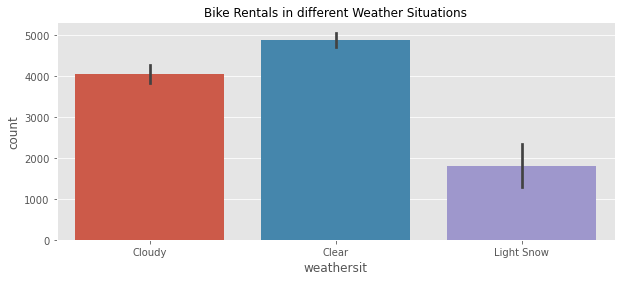

In [12]:
# Analysis between weathersit and count

plt.figure(figsize=(10,4))
sns.barplot('weathersit','count',data=bike)
plt.title('Bike Rentals in different Weather Situations',fontsize=12)
plt.show()

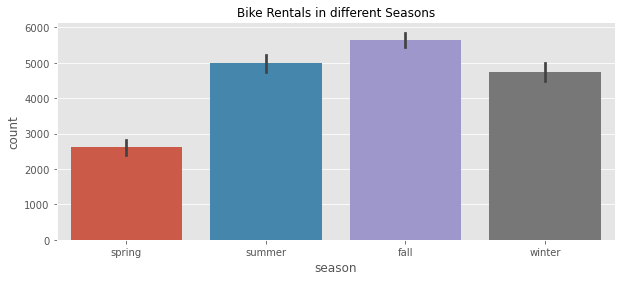

In [13]:
# Analysis between season and count

plt.figure(figsize=(10,4))
sns.barplot('season','count',data=bike)
plt.title('Bike Rentals in different Seasons',fontsize=12)
plt.show()

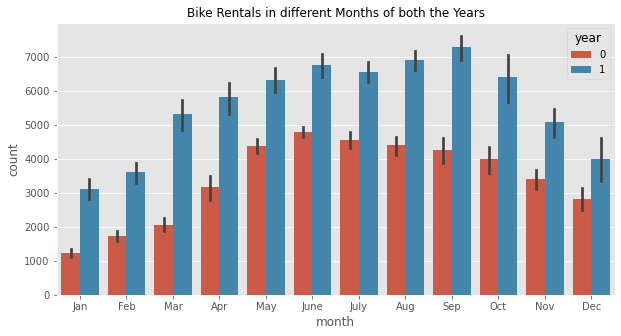

In [14]:
# Analysis of the Bike Rentals for each month of both the years

plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike)
plt.title('Bike Rentals in different Months of both the Years',fontsize=12)
plt.show()

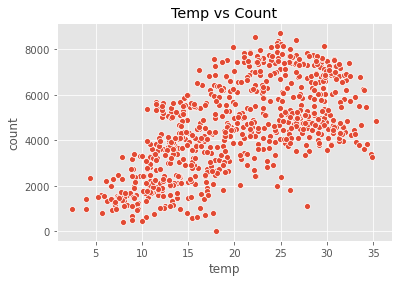

In [15]:
# Analysis of Bike Rentals with Temperature

sns.scatterplot(x='temp',y='count' ,data=bike)
plt.title('Temp vs Count')
plt.show()

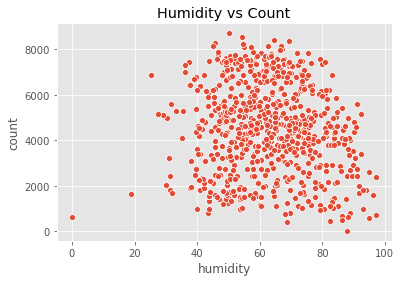

In [16]:
# Analysis of Bike Rentals with Humidity

sns.scatterplot(x='humidity',y='count' ,data=bike)
plt.title('Humidity vs Count')
plt.show()

### Correlation between the variables

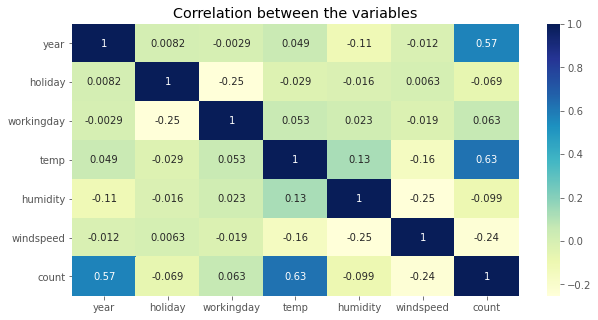

In [17]:
# Heatmap to visualise the correlation between the variables

plt.figure(figsize=(10, 5))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.title("Correlation between the variables")
plt.show()

Both the pairplot and heatmap, above, help to interpret the data well and identify the variables that can turn out to be useful in building the model. Hence, Linear Regression Model can be used.

### Creating Dummy Variables

Creating dummy variables for - month, season, weathersit and weekday

In [18]:
month_dummy = pd.get_dummies(bike.month,drop_first=True)
weekday_dummy = pd.get_dummies(bike.weekday,drop_first=True)
weathersit_dummy = pd.get_dummies(bike.weathersit,drop_first=True)
season_dummy = pd.get_dummies(bike.season,drop_first=True)

In [19]:
# Adding the dummy variables to the original dataframe

bike = pd.concat([month_dummy,weekday_dummy,weathersit_dummy,season_dummy,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow,spring,summer,winter,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,spring,0,Jan,0,Sun,0,Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [20]:
# Dropping the original columns - month, weekday, weathersit and season, since dummy variables have already been created for them

bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.shape

(730, 29)

### Splitting the Data into Training and Testing Sets

In [21]:
np.random.seed(0)

bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features using MinMax Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# Creating a list of numeric variables

num_vars=['temp','humidity','windspeed','count']

In [24]:
# Fit the data

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [25]:
# Checking numeric variables after scaling the features
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and y sets for the model building

In [26]:
y_train = bike_train.pop('count')
X_train = bike_train

### Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE - Recursive Feature Elimination

In [27]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Cloudy', True, 1),
 ('Light Snow', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [30]:
# Columns for which rfe_support is true

col = X_train.columns[rfe.support_]
col

Index(['July', 'Sep', 'Sat', 'Sun', 'Cloudy', 'Light Snow', 'spring', 'summer',
       'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 1

In [31]:
# Creating the first dataframe model with RFE selected variables
X_train_1 = X_train[col]

In [32]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_1)

In [33]:
# Running the linear model

lm = sm.OLS(y_train,X_train_1).fit() 

In [34]:
# Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.11e-191
Time:                        21:43:58   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.0

In [35]:
# Dropping the const variable

X_train_1 = X_train_1.drop(['const'], axis=1)

In [36]:
# Calculating the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,50.68
2,Sat,12.20
3,Sun,11.79
6,spring,5.02
12,temp,3.62
8,winter,3.49
10,holiday,2.91
7,summer,2.62
13,humidity,1.91
4,Cloudy,1.57


We will be following the below rule to drop the variables one by one, as per the priorities mentioned by their sequences:-

* We will first check the summary and VIF
* If a variable has got high p-value(>0.05) as well as high VIF(>5), we need to drop that first
* If a variable has got high p-value(>0.05) but low VIF(<5), then we need to drop such
* Still if we have a variable with low p-value(<0.05) but high VIF(>5), we need to drop such at the very end

### Model 2

In [37]:
# Rebuilding the model without 'holiday'

X_train_2 = X_train_1.drop(['holiday'], axis=1)

In [38]:
# Adding the contsant variable

X_train_2 = sm.add_constant(X_train_2)

In [39]:
# Running the linear model

lm = sm.OLS(y_train,X_train_2).fit() 

In [40]:
# Summary of the new model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.11e-191
Time:                        21:43:59   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.042      4.301      0.0

In [41]:
# Dropping the const variable

X_train_2 = X_train_2.drop(['const'], axis=1)

In [42]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,32.10
11,temp,18.99
10,workingday,18.41
2,Sat,4.91
13,windspeed,4.91
6,spring,4.80
3,Sun,4.76
8,winter,3.69
7,summer,3.04
4,Cloudy,2.31


### Model 3

In [43]:
# Rebuilding the model without 'humidity'

X_train_3 = X_train_2.drop(['humidity'], axis=1)

In [44]:
# Adding the contsant variable

X_train_3 = sm.add_constant(X_train_3)

In [45]:
# Running the linear model

lm = sm.OLS(y_train,X_train_3).fit()

In [46]:
# Summary of the new model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.28e-188
Time:                        21:44:00   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1008      0.038      2.624      0.0

In [47]:
# Dropping the const variable

X_train_3 = X_train_3.drop(['const'], axis=1)

In [48]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,16.19
11,temp,12.74
12,windspeed,4.76
2,Sat,4.45
3,Sun,4.21
6,spring,3.82
8,winter,2.78
7,summer,2.76
9,year,2.07
0,July,1.60


### Model 4

In [49]:
# Rebuilding the model without 'workingday'

X_train_4 = X_train_3.drop(['workingday'], axis=1)

In [50]:
# Adding the contsant variable

X_train_4 = sm.add_constant(X_train_4)

In [51]:
# Running the linear model

lm = sm.OLS(y_train,X_train_4).fit()

In [52]:
# Summary of the new model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.06e-186
Time:                        21:44:01   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2003      0.030      6.760      0.0

In [53]:
# Dropping the const variable

X_train_4 = X_train_4.drop(['const'], axis=1)

In [54]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.18
11,windspeed,4.62
7,summer,2.24
6,spring,2.11
9,year,2.07
8,winter,1.82
0,July,1.59
4,Cloudy,1.55
1,Sep,1.33
2,Sat,1.22


### Model 5

In [55]:
# Rebuilding the model without 'Sat'

X_train_5 = X_train_4.drop(['Sat'], axis=1)

In [56]:
# Adding the contsant variable

X_train_5 = sm.add_constant(X_train_5)

In [57]:
# Running the linear model

lm = sm.OLS(y_train,X_train_5).fit()

In [58]:
# Summary of the new model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.37e-187
Time:                        21:44:03   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2034      0.030      6.877      0.0

In [59]:
# Dropping the const variable

X_train_5 = X_train_5.drop(['const'], axis=1)

In [60]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.14
10,windspeed,4.60
6,summer,2.23
5,spring,2.09
8,year,2.07
7,winter,1.80
0,July,1.59
3,Cloudy,1.55
1,Sep,1.33
2,Sun,1.17


### Model 6

In [61]:
# Rebuilding the model without 'windspeed'

X_train_6 = X_train_5.drop(['windspeed'], axis=1)

In [62]:
# Adding the contsant variable

X_train_6 = sm.add_constant(X_train_6)

In [63]:
# Running the linear model

lm = sm.OLS(y_train,X_train_6).fit()

In [64]:
# Summary of the new model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.80e-181
Time:                        21:44:04   Log-Likelihood:                 481.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1534      0.029      5.230      0.0

In [65]:
# Dropping the const variable

X_train_6 = X_train_6.drop(['const'], axis=1)


In [66]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.27
8,year,2.06
6,summer,1.95
7,winter,1.59
0,July,1.58
3,Cloudy,1.55
5,spring,1.40
1,Sep,1.33
2,Sun,1.17
4,Light Snow,1.07


### Model 7

In [67]:
# Rebuilding the model without 'summer'

X_train_7 = X_train_6.drop(['summer'], axis=1)

In [68]:
# Adding the contsant variable

X_train_7 = sm.add_constant(X_train_7)

In [69]:
# Running the linear model

lm = sm.OLS(y_train,X_train_7).fit()

In [70]:
# Summary of the new model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          6.47e-181
Time:                        21:44:06   Log-Likelihood:                 478.64
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     500   BIC:                            -894.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.022      8.982      0.0

In [71]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif = vif[vif['Features']!='const']    # Ignoring to display the vif of 'const'
vif

,Features,VIF
9,temp,2.79
6,spring,2.53
7,winter,1.68
1,July,1.28
2,Sep,1.09
4,Cloudy,1.04
5,Light Snow,1.04
8,year,1.02
3,Sun,1.01


### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
lm = sm.OLS(y_train,X_train_7).fit()  #As obtained previously
y_train_count = lm.predict(X_train_7)

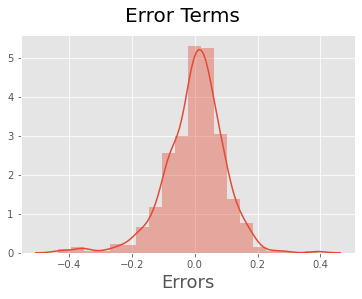

In [73]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Applying the scaling on the test sets

In [74]:
num_vars=['temp','humidity','windspeed','count']

# Fit and transform operations are done on the training data but only transform operation will be done on the test data

bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


### Dividing into X_test and y_test

In [75]:
y_test = bike_test.pop('count')
X_test = bike_test

In [76]:
# Adding constant variable to test dataframe

X_test_m7 = sm.add_constant(X_test)

In [77]:
# Creating X_test_m7 dataframe by dropping variables which were removed till our final Model 7 in the training dataset

X_test_m7 = X_test_m7.drop(['holiday','humidity','workingday','Sat','windspeed','summer','Aug','Dec','Feb','Jan','June','Mar','May','Nov','Oct','Mon','Thu','Tue','Wed'], axis = 1)

In [78]:
# Making predictions using the seventh model

y_pred_m7 = lm.predict(X_test_m7)

### Model Evaluation

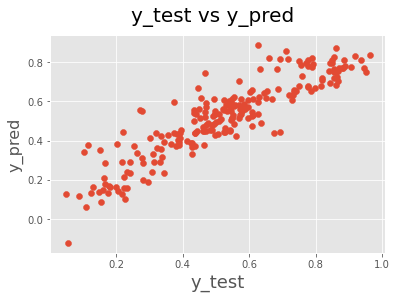

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.show()

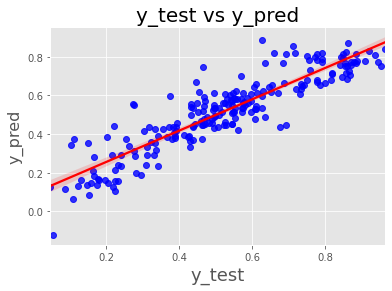

In [80]:
# Regression plot

sns.regplot(x = y_test, y = y_pred_m7, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Calculation of R-square and Adjusted R-square values

In [81]:
# Evaluate R-square for test dataset

from sklearn.metrics import r2_score
r2_score(y_test,y_pred_m7)

0.8113861413387277

In [82]:
# Adjusted R^2
# adj r2 = 1-((1-R2)*(n-1)/(n-p-1))

# n = sample size (in this case the value is 220, as yielded before)
# p = number of independent variables(in this case the value is 9)

Adj_r2 = 1 - ((1 - 0.8065842474886509) * 219 / (220-9-1))
print(Adj_r2)

0.7982950009524502


For the training dataset, the R^2 value was 0.822 and adjusted R^2 value was 0.819.

For the testing dataset, the R^2 value obtained is 0.806 and adjusted R^2 value obtained is 0.798.




Hence the equation of our best fitted line is:-

$ count = 0.0603 \times Sep + 0.0524 \times winter + 0.2335 \times year + 0.4693 \times temp - 0.0658 \times July - 0.0444 \times Sun - 0.0781 \times Cloudy - 0.2997 \times Light Snow - 0.1146 \times spring $


Overall we have a decent model, but we also acknowledge that we could do better. 

### Interpretations

* We have arrived at a very decent model for the the demand for shared bikes with the significant variables.

* We can see that temperature variable is having the highest coefficient of 0.4693, which means if the temperature increases by one unit, the number of bike rentals increases by 0.4693 units.

* The other significant variables having positive coefficients are September and Winter.

* There are some variables with negative coefficients too, like July, Sunday, Cloudy, Light Snow and Spring. A negative coefficient suggests that, as the independent variable increases, the dependent variable tends to decrease,a dn vice-versa.

### Business Goals

* The demand for bikes is observed to be more in 2019, than its previous year 2018. The recent dip in business may be due to the ongoing pandemic situation.

* The demand for bike rentals are found to be the least during the Spring season. Hence, special discounts may be considered during this season to get back the demand.

* The demand for bike rentals are mostly on Saturdays, but very less on the Sundays, probably due to the weekend holiday.

* January and February are the months, in which demands have been observed to be at the bottom, whereas September and its adjacent months show the highest demands. This is probably due to the vacation time during those two impacted months.

* The rental demands are the most during the clear days, followed by those days which are a bit cloudy. But sharp fall in the demand have been observed during the adverse weather conditions during snowing, raining and thunderstorms.

* Temparature plays a cruical role in the bike rental demand. The demand seems to be pretty decent on a day with a medium to high temperature. Lower the temperature, lower the demand.

* The company needs to provide special discounts to attract more rental demands during the Spring season, or during the months of January and February, on Sundays, or on a particular day when it is snowing or raining.